<a href="https://colab.research.google.com/github/Mal-Lem/Data-Visualisation/blob/main/3_Visualisations_avec_plotly_cours_%C3%A9l%C3%A8ve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Différences de création de graphique entre Matplotlib, Seaborn et plotly </h1>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
np.random.seed(0)
dates = pd.date_range('20240101', periods=12, freq='M')
data = pd.DataFrame({
    'Date': dates,
    'Ventes': np.random.randn(12) * 200 + 1200
})
data

<ipython-input-7-784cafbf7771>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Date,Ventes
0,2024-01-31,1552.810469
1,2024-02-29,1280.031442
2,2024-03-31,1395.747597
3,2024-04-30,1648.178640
4,2024-05-31,1573.511598
5,2024-06-30,1004.544424
6,2024-07-31,1390.017684
7,2024-08-31,1169.728558
8,2024-09-30,1179.356230
9,2024-10-31,1282.119700


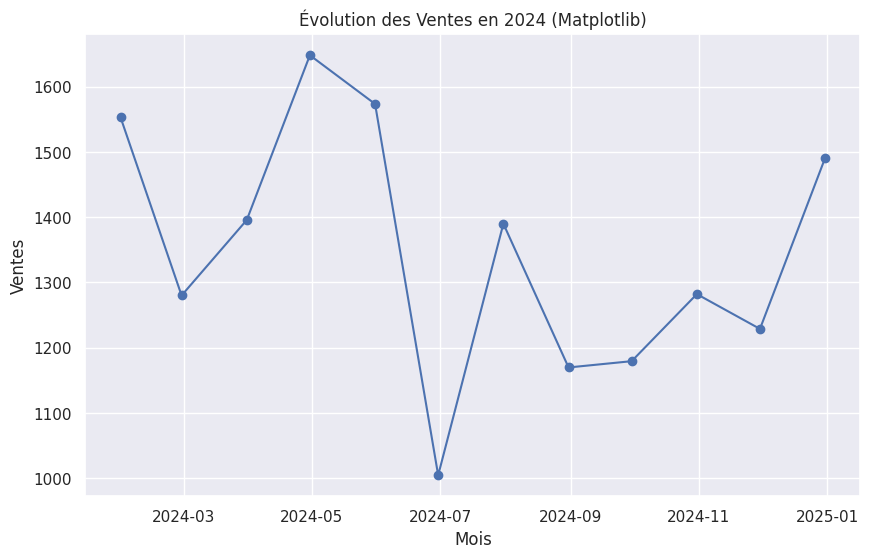

In [8]:
#Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Ventes'], marker='o', linestyle='-', color='b')
plt.title('Évolution des Ventes en 2024 (Matplotlib)')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.grid(True)
plt.show()

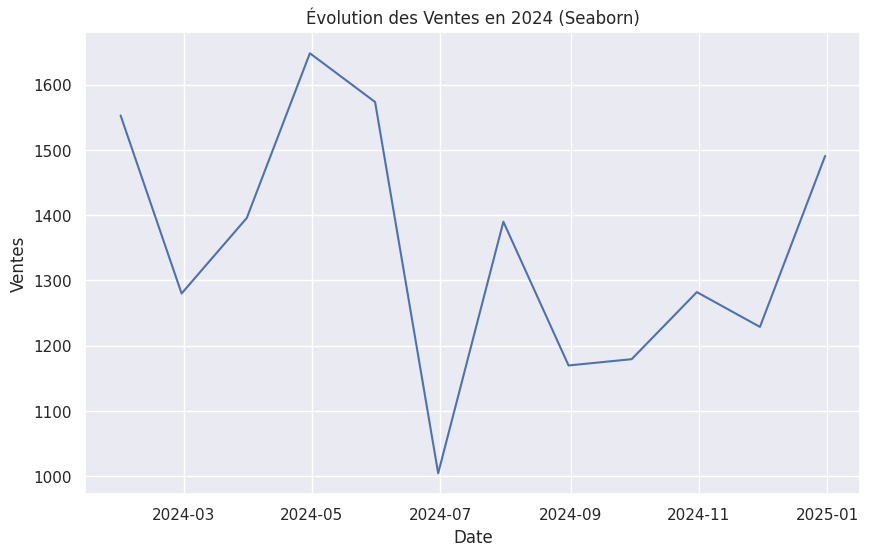

In [9]:
#Seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid") # Application d'un style, qui va permettre d'avoir de bonnes combinaisons de couleurs
sns.lineplot(data=data, x='Date', y='Ventes') # nativement compatible avec Pandas, puisqu'on peut directement indiquer un dataframe
plt.title('Évolution des Ventes en 2024 (Seaborn)')
plt.show()

In [10]:
fig = px.line(data, x='Date', y='Ventes', title='Évolution des Ventes en 2024 (Plotly)',
              markers=True,  # Ajoute des marqueurs aux points de données
              line_shape='linear')  # Ligne continue entre les points

fig.show()

In [11]:
#sensiblement la même logique pour les nuages de points
fig = px.scatter(data, x='Date', y='Ventes', title='Ventes en 2024 (Plotly)')
fig.show()

In [12]:
import pandas as pd

titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1> afficher des réparitions par zone ou par taille </h1>

<b> le pie chart </b>

Pie chart qui montre la répartition des passagers du Titanic entre survivants et morts.

In [13]:
# Création d'un Pie Chart pour les survivants et les morts
survived=titanic['Survived'].value_counts()
fig_pie = px.pie(survived,values=survived.values, names=survived.index)
fig_pie.show()

<b> Le sunburst </b>

Sunburst montrant la répartition des survivants et des morts, subdivisée par classes de passagers.

In [14]:
fig_sunburst = px.sunburst(titanic,path=['Survived', 'Pclass'], values='PassengerId', title='Survivors and Deaths by Passenger Class')
fig_sunburst.show()
#N'hésitez pas à cliquer sur une zone pour avoir le détail

<b> Le treemap </b>

Un treemap pour visualiser les passagers en fonction de leur port de départ, subdivisé par classe et ensuite par statut de survie.

In [15]:
# Création d'un Treemap pour les ports de départ, classes et survivants
titanic['Embarked'] = titanic['Embarked'].fillna('Unknown')
#Attention le treamp ne gère pas les valeurs manquantes (notamment dans Embarked), il faut donc soit les combler, soit supprimer les lignes correspondantes
fig_treemap = px.treemap(titanic,path=['Embarked', 'Pclass', 'Survived'], values='PassengerId', title='Passenger par embarquement, Class, et Survie')
fig_treemap.show()

In [16]:
# Remplacer les valeurs NaN dans les colonnes utilisées

# Création du Treemap avec les données nettoyées
fig_treemap = px.treemap()

fig_treemap.show()

# Le résultat n'est pas très clair car il n'affiche que des ID ou des acronymes

In [17]:
import pandas as pd

titanic_treemap = titanic.copy()

# Supposons que 'titanic' est votre DataFrame
# Remplacement pour 'Pclass'
class_map = {1: '1st Class', 2: '2nd Class', 3: '3rd Class'}
titanic_treemap['Pclass'] = titanic_treemap['Pclass'].map(class_map)

# Remplacement pour 'Embarked'
embarked_map = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton', 'Unknown': 'Unknown'}
titanic_treemap['Embarked'] = titanic_treemap['Embarked'].fillna('Unknown')  # Remplacer NaN d'abord si nécessaire
titanic_treemap['Embarked'] = titanic_treemap['Embarked'].map(embarked_map)

# Remplacement pour 'Survived'
survived_map = {0: 'Died', 1: 'Survived'}
titanic_treemap['Survived'] = titanic_treemap['Survived'].map(survived_map)

# Vérification des changements
titanic_treemap[['Pclass', 'Embarked', 'Survived']].head()

,Pclass,Embarked,Survived
0,3rd Class,Southampton,Died
1,1st Class,Cherbourg,Survived
2,3rd Class,Southampton,Survived
3,1st Class,Southampton,Survived
4,3rd Class,Southampton,Died


In [18]:
# Création d'un Treemap avec des labels compréhensibles
fig_treemap = px.treemap(titanic_treemap,path=['Embarked', 'Pclass', 'Survived'], values='PassengerId', title='Passenger par embarquement, Class, et Survie')

fig_treemap.show()
#N'hésitez pas à cliquer sur une zone pour avoir le détail

<h1> Afficher des segmentations successives </h1>

<b> afficher des tunnels </b>

On souhaite afficher un tunnel montrant :
- Le volume total de passagers
- Le volume de survivants parmi les passagers
- Le volume d'hommes parmi les survivants
- Le volume d'hommes ayant entre 18 et 25 ans parmi les hommes surviants

In [19]:
# Total des passagers
total_passengers = len(titanic)

# Survivants
survivors = titanic['Survived'].sum()

# Hommes parmi les survivants
male_survivors = titanic[(titanic['Survived'] == 1) & (titanic['Sex'] == 'male')]['PassengerId'].count()

# Hommes entre 18 et 25 ans parmi les survivants
young_male_survivors = titanic[
    (titanic['Survived'] == 1) &
    (titanic['Sex'] == 'male') &
    (titanic['Age'] >= 18) &
    (titanic['Age'] <= 25)
]['PassengerId'].count()

In [20]:
# Préparer les données du funnel
funnel_data_survivors = pd.DataFrame({
    'etape': ['Total passagers', 'dont survivants', 'dont des hommes', 'dont des jeunes hommes (18-25)'],
    'Nombre': [total_passengers, survivors, male_survivors, young_male_survivors]
})

funnel_data_survivors

,etape,Nombre
0,Total passagers,891
1,dont survivants,342
2,dont des hommes,109
3,dont des jeunes hommes (18-25),14


In [21]:
fig_funnel_survivors = px.funnel(funnel_data_survivors, x='Nombre', y='etape')
fig_funnel_survivors.show()

In [22]:
# Morts
deceased = titanic[titanic['Survived'] == 0]['PassengerId'].count()

# Hommes parmi les morts
male_deceased = titanic[(titanic['Survived'] == 0) & (titanic['Sex'] == 'male')]['PassengerId'].count()

# Hommes entre 18 et 25 ans parmi les morts
young_male_deceased = titanic[
    (titanic['Survived'] == 0) &
    (titanic['Sex'] == 'male') &
    (titanic['Age'] >= 18) &
    (titanic['Age'] <= 25)
]['PassengerId'].count()

# Préparer les données du funnel
funnel_data_deceased = pd.DataFrame({
    'etape': ['Total Passengers', 'dont décédés', 'dont des hommes', 'dont des jeunes hommes (18-25)'],
    'nombre': [total_passengers, deceased, male_deceased, young_male_deceased]
})

funnel_data_deceased

,etape,nombre
0,Total Passengers,891
1,dont décédés,549
2,dont des hommes,468
3,dont des jeunes hommes (18-25),107


In [23]:
#On inverse les x et les y pour obtenir un format vertical
fig_funnel_deceased = px.funnel(funnel_data_deceased, x='nombre', y='etape')
fig_funnel_deceased.show()

<h1> Visualisation des relations entre variables </h1>

Utiliser px.scatter_matrix pour créer une matrix de dispersion qui montre les relations entre les variables sélectionnées.

In [24]:
# Sélection des colonnes numériques pertinentes
columns = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
# Nettoyage des données: Suppression des valeurs manquantes (obligatoire pour les scatter)
titanic_clean = titanic.dropna(subset=columns)

In [25]:
pd.DataFrame.iteritems = pd.DataFrame.items # obligation car bug dans la visualisation de plotly

fig = px.scatter_matrix(titanic_clean,dimensions=columns,color='Survived')
fig.update_traces(diagonal_visible=False)
      # masquer les histogrammes sur la diagonale
fig.show()

In [26]:
#Pour quelque chose d'un peu plus visuel, voici un scattermatrix avec un dataset s'y pretant d'avantage
df = px.data.iris()
fig = px.scatter_matrix(data_frame=df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
fig.show()

<h1> Création d'animations temporelles </h1>

In [27]:
#Le jeu de données Titanic n'est pas adapté, nous allons plutôt en utiliser un inclus dans la librairie
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [28]:
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

<h1> Exercice </h1>

Objectif : créer une visualisation qui explore la relation entre l'âge des passagers, leur tarif de billet, et leur taux de survie sur le Titanic.


1. Préparation des Données :

Assurez-vous de nettoyer les données en remplissant ou en supprimant les valeurs manquantes, surtout pour les colonnes Age et Fare.

2. Création d'un Scatter Plot Interactif

- Utilisez la fonction px.scatter de Plotly Express pour créer un scatter plot.
- Définissez Age comme axe des x et Fare comme axe des y.
- Utilisez la colonne Survived pour changer la couleur des points
- Paramétrez la taille des points en fonction de la colonne Pclass pour montrer visuellement la classe des passagers

In [33]:
titanic['Age'].isnull().sum()
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [34]:
titanic['Age'].isnull().sum()

np.int64(0)

In [35]:
titanic['Fare'].isnull().sum()

np.int64(0)

In [39]:
px.scatter(titanic,x='Age',y='Fare',size="Pclass", color="Survived",title= "age par rapport à fare, colorer par survie, taille par classe")